In [1]:
include("c:/Users/vikra/OneDrive/Desktop/project/src/QuantumDD/QuantumDD.jl")
cd("c:/Users/vikra/OneDrive/Desktop/project")
using Pkg
Pkg.activate(".")
using .QuantumDD, Plots, LsqFit, FFTW, QuantumToolbox, Dates, DelimitedFiles, Printf

  Activating project at `c:\Users\vikra\OneDrive\Desktop\project`


## Hahn Echo under white noise + dc offset

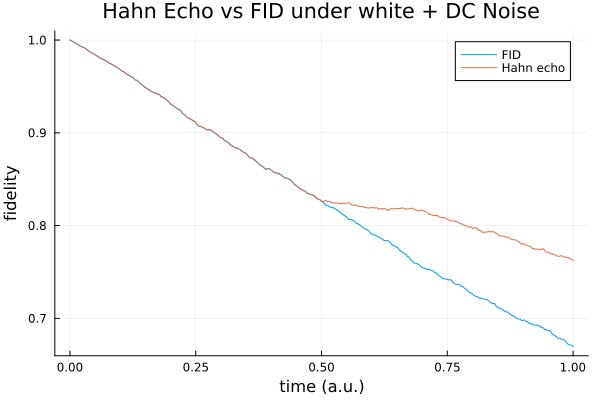

In [14]:
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

# --- 2.  Simulation parameters ----------------------------------------
T_max        = 1.0        # total experiment time (a.u.)
dt           = 1e-3
n_real       = 1000        # ensemble size (small for demo)
dc_amplitude = 1        # strength of the quasi-static field (rad/s)
σ = 0.05
# --- 3.  Modulation functions -----------------------------------------
fid_mod   = t -> 1.0                          # FID  (no refocus)
hahn_mod  = t -> (t < T_max/2 ? 1.0 : -1.0)   # Hahn echo flip at T/2

# --- 4.  Run simulations ----------------------------------------------
Tvals, fid_avg  = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,           # no stochastic part
                     dc=dc_amplitude,          # pure DC noise
                     S_func=S_func,
                     mod_func=fid_mod)

_,    hahn_avg = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,
                     dc=dc_amplitude,
                     S_func=S_func,
                     mod_func=hahn_mod)

# --- 5.  Plot ---------------------------------------------------------
plot(Tvals, fid_avg;  label="FID")
plot!(Tvals, hahn_avg; label="Hahn echo")
xlabel!("time (a.u.)")
ylabel!("fidelity")
title!("Hahn Echo vs FID under white + DC Noise")

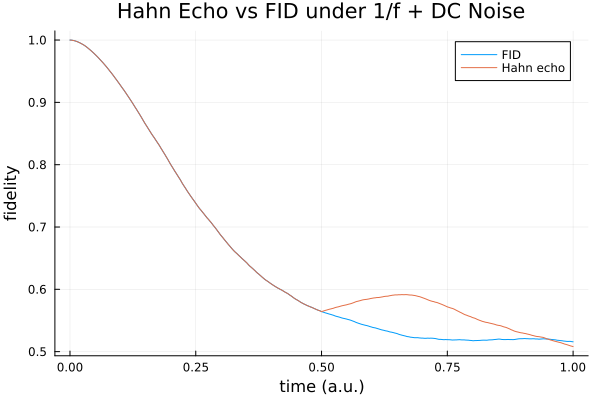

In [15]:
parameters = get_preset_params("1/f")
S_func = ω -> S(ω; parameters...)

# --- 2.  Simulation parameters ----------------------------------------
T_max        = 1.0        # total experiment time (a.u.)
dt           = 1e-3
n_real       = 1000        # ensemble size (small for demo)
dc_amplitude = 1        # strength of the quasi-static field (rad/s)
σ = 0.01
# --- 3.  Modulation functions -----------------------------------------
fid_mod   = t -> 1.0                          # FID  (no refocus)
hahn_mod  = t -> (t < T_max/2 ? 1.0 : -1.0)   # Hahn echo flip at T/2

# --- 4.  Run simulations ----------------------------------------------
Tvals, fid_avg  = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,           # no stochastic part
                     dc=dc_amplitude,          # pure DC noise
                     S_func=S_func,
                     mod_func=fid_mod)

_,    hahn_avg = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,
                     dc=dc_amplitude,
                     S_func=S_func,
                     mod_func=hahn_mod)

# --- 5.  Plot ---------------------------------------------------------
plot(Tvals, fid_avg;  label="FID")
plot!(Tvals, hahn_avg; label="Hahn echo")
xlabel!("time (a.u.)")
ylabel!("fidelity")
title!("Hahn Echo vs FID under 1/f + DC Noise")

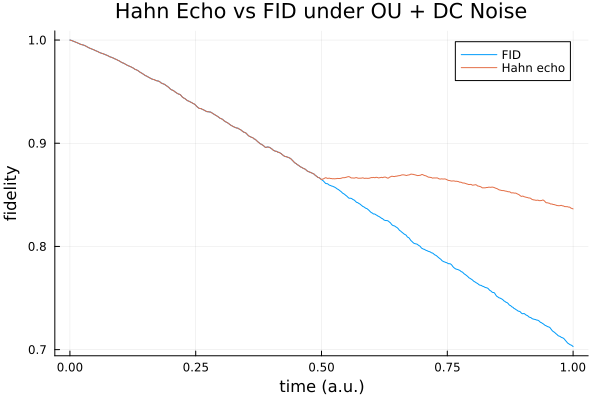

In [19]:
parameters = get_preset_params("ou")
S_func = ω -> S(ω; parameters...)

# --- 2.  Simulation parameters ----------------------------------------
T_max        = 1.0        # total experiment time (a.u.)
dt           = 1e-3
n_real       = 1000        # ensemble size (small for demo)
dc_amplitude = 1        # strength of the quasi-static field (rad/s)
σ = 0.025
# --- 3.  Modulation functions -----------------------------------------
fid_mod   = t -> 1.0                          # FID  (no refocus)
hahn_mod  = t -> (t < T_max/2 ? 1.0 : -1.0)   # Hahn echo flip at T/2

# --- 4.  Run simulations ----------------------------------------------
Tvals, fid_avg  = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,           # no stochastic part
                     dc=dc_amplitude,          # pure DC noise
                     S_func=S_func,
                     mod_func=fid_mod)

_,    hahn_avg = simulate_modulated_noise_fidelity(
                     T_max=T_max, dt=dt,
                     n_realizations=n_real,
                     target_std=σ,
                     dc=dc_amplitude,
                     S_func=S_func,
                     mod_func=hahn_mod)

# --- 5.  Plot ---------------------------------------------------------
plot(Tvals, fid_avg;  label="FID")
plot!(Tvals, hahn_avg; label="Hahn echo")
xlabel!("time (a.u.)")
ylabel!("fidelity")
title!("Hahn Echo vs FID under OU + DC Noise")

## Hahn Echo vs FID under different noise models

### White noise

In [ ]:
# Running a simulation of FID under 1/f noise
sequence = "CPMG"
noise_type = "white" # This name goes in the save file names
T_max = 1.0
n_realizations = 1000
dt = 1e-3   # Time step for simulation
pulse_duration = dt # Pulse duration can't be smaller than dt
σ_z = 0.2
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
initial_guess = [0.01, 1, 0.5] # Initial guess for fitting parameters
lower_lims = [0.0, 0.5, 0.0]   # Lower limits for fitting parameters
# Noise setup
parameters = get_preset_params("white")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_modulated_noise_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std_z = σ_z,
    n_realizations = n_realizations,
    S_func = S_func,

)
# Defining the fit model
fit_model(t, p) = p[3] .+ (1 - p[3]).* exp.(- (t .* abs.(p[1])).^p[2])
fit_fid = curve_fit(fit_model, T_vals, avg_fid, initial_guess; lower=lower_lims)
T2_star = 1/fit_fid.param[1]
β_eff = fit_fid.param[2]
plt = plot(T_vals, avg_fid, label="FID: T2* = $( @sprintf("%.3g", T2_star) ), β = $( @sprintf("%.2f", β_eff) )",
            xlabel="T (t/τ0)", ylabel="Fidelity")
c = plt.series_list[end].plotattributes[:seriescolor]

plot!(plt, T_vals, fit_model(T_vals, fit_fid.param),
      label=false, linestyle=:dash, color=c)
@info "T2* for FID: $T2_star"

plot!(plt, legend=:topright)
title!(plt, "FID under white Noise")
display(plt)

timestamp = Dates.format(now(), "yyyymmdd_HHMM")
savefig("plots/$(sequence)_$(noise_type)_FID_$(timestamp).png")

In [ ]:
title!(plt, "Hahn Echo under white noise")
# Simulate CPMG sequences with different pulse counts
@info "Simulating Hahn Echo"
control_terms = make_control_terms(sequence, T_max, 1;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std_z = σ_z,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )


    fit_ctrl = curve_fit(fit_model, T_vals_ctrl, avg_fid_ctrl, initial_guess;lower=lower_lims)
    T2_eff = 1/fit_ctrl.param[1] # acts like a decay scale not real T2
    β_eff = fit_ctrl.param[2]
    # plot the fit and the data
    @info "T2_eff for Hahn Echo with pulses: $T2_eff"
    plot!(plt, T_vals_ctrl, avg_fid_ctrl,
    label="Hahn Echo, T2_eff = $( @sprintf("%.3g", T2_eff) ), β = $( @sprintf("%.2f", β_eff) )")
    c = plt.series_list[end].plotattributes[:seriescolor]
    plot!(plt, T_vals_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param), linestyle=:dash, label=false, color=c)
    timestamp = Dates.format(now(), "yyyymmdd_HHMM")

    # Save the raw fidelity data
    data_out = hcat(T_vals_ctrl, avg_fid_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param))
    writedlm("data/$(sequence)_$(noise_type)_data_$(timestamp).csv", 
            data_out, ',')

    # Save the fit params (A = decay rate, β = exponent, offset)
    writedlm("data/$(sequence)_$(noise_type)_fitparams_$(timestamp).csv", 
            fit_ctrl.param', ',')
    savefig("plots/$(sequence)_$(noise_type)_plot_$(timestamp).png")



display(plt)

### 1/f Noise

In [ ]:
# Running a simulation of FID under 1/f noise
sequence = "CPMG"
noise_type = "1_over_f" # This name goes in the save file names
T_max = 1.0
n_realizations = 1000
dt = 1e-3   # Time step for simulation
pulse_duration = dt # Pulse duration can't be smaller than dt
σ_z = 0.025
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
initial_guess = [0.01, 1, 0.5] # Initial guess for fitting parameters
lower_lims = [0.0, 0.5, 0.0]   # Lower limits for fitting parameters
# Noise setup
parameters = get_preset_params("1/f")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std_z = σ_z,
    n_realizations = n_realizations,
    S_func_z = S_func,
)
# Defining the fit model
fit_model(t, p) = p[3] .+ (1 - p[3]).* exp.(- (t .* abs.(p[1])).^p[2])
fit_fid = curve_fit(fit_model, T_vals, avg_fid, initial_guess; lower=lower_lims)
T2_star = 1/fit_fid.param[1]
β_eff = fit_fid.param[2]
plt = plot(T_vals, avg_fid, label="FID: T2* = $( @sprintf("%.3g", T2_star) ), β = $( @sprintf("%.2f", β_eff) )",
            xlabel="T (t/τ0)", ylabel="Fidelity")
c = plt.series_list[end].plotattributes[:seriescolor]

plot!(plt, T_vals, fit_model(T_vals, fit_fid.param),
      label=false, linestyle=:dash, color=c)
@info "T2* for FID: $T2_star"

plot!(plt, legend=:topright)
title!(plt, "FID under 1/f Noise")
display(plt)

timestamp = Dates.format(now(), "yyyymmdd_HHMM")
savefig("plots/$(sequence)_$(noise_type)_FID_$(timestamp).png")

In [ ]:
title!(plt, "Hahn Echo under 1/f noise")
# Simulate CPMG sequences with different pulse counts
@info "Simulating Hahn Echo"
control_terms = make_control_terms(sequence, T_max, 1;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std_z = σ_z,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )


    fit_ctrl = curve_fit(fit_model, T_vals_ctrl, avg_fid_ctrl, initial_guess;lower=lower_lims)
    T2_eff = 1/fit_ctrl.param[1] # acts like a decay scale not real T2
    β_eff = fit_ctrl.param[2]
    # plot the fit and the data
    @info "T2_eff for Hahn Echo with pulses: $T2_eff"
    plot!(plt, T_vals_ctrl, avg_fid_ctrl,
    label="Hahn Echo, T2_eff = $( @sprintf("%.3g", T2_eff) ), β = $( @sprintf("%.2f", β_eff) )")
    c = plt.series_list[end].plotattributes[:seriescolor]
    plot!(plt, T_vals_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param), linestyle=:dash, label=false, color=c)
    timestamp = Dates.format(now(), "yyyymmdd_HHMM")

    # Save the raw fidelity data
    data_out = hcat(T_vals_ctrl, avg_fid_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param))
    writedlm("data/$(sequence)_$(noise_type)_data_$(timestamp).csv", 
            data_out, ',')

    # Save the fit params (A = decay rate, β = exponent, offset)
    writedlm("data/$(sequence)_$(noise_type)_fitparams_$(timestamp).csv", 
            fit_ctrl.param', ',')
    savefig("plots/$(sequence)_$(noise_type)_plot_$(timestamp).png")



display(plt)

### OU noise

In [ ]:
# Running a simulation of FID under 1/f noise
sequence = "CPMG"
noise_type = "ou" # This name goes in the save file names
T_max = 1.0
n_realizations = 1000
dt = 1e-3   # Time step for simulation
pulse_duration = dt # Pulse duration can't be smaller than dt
σ_z = 0.1
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
initial_guess = [0.01, 1, 0.5] # Initial guess for fitting parameters
lower_lims = [0.0, 0.5, 0.0]   # Lower limits for fitting parameters
# Noise setup
parameters = get_preset_params("ou")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std_z = σ_z,
    n_realizations = n_realizations,
    S_func_z = S_func,
)
# Defining the fit model
fit_model(t, p) = p[3] .+ (1 - p[3]).* exp.(- (t .* abs.(p[1])).^p[2])
fit_fid = curve_fit(fit_model, T_vals, avg_fid, initial_guess; lower=lower_lims)
T2_star = 1/fit_fid.param[1]
β_eff = fit_fid.param[2]
plt = plot(T_vals, avg_fid, label="FID: T2* = $( @sprintf("%.3g", T2_star) ), β = $( @sprintf("%.2f", β_eff) )",
            xlabel="T (t/τ0)", ylabel="Fidelity")
c = plt.series_list[end].plotattributes[:seriescolor]

plot!(plt, T_vals, fit_model(T_vals, fit_fid.param),
      label=false, linestyle=:dash, color=c)
@info "T2* for FID: $T2_star"

plot!(plt, legend=:topright)
title!(plt, "FID under OU Noise")
display(plt)

timestamp = Dates.format(now(), "yyyymmdd_HHMM")
savefig("plots/$(sequence)_$(noise_type)_FID_$(timestamp).png")

In [ ]:
title!(plt, "Hahn Echo under OU noise")
# Simulate CPMG sequences with different pulse counts
@info "Simulating Hahn Echo"
control_terms = make_control_terms(sequence, T_max, 1;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std_z = σ_z,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )


    fit_ctrl = curve_fit(fit_model, T_vals_ctrl, avg_fid_ctrl, initial_guess;lower=lower_lims)
    T2_eff = 1/fit_ctrl.param[1] # acts like a decay scale not real T2
    β_eff = fit_ctrl.param[2]
    # plot the fit and the data
    @info "T2_eff for Hahn Echo with pulses: $T2_eff"
    plot!(plt, T_vals_ctrl, avg_fid_ctrl,
    label="Hahn Echo, T2_eff = $( @sprintf("%.3g", T2_eff) ), β = $( @sprintf("%.2f", β_eff) )")
    c = plt.series_list[end].plotattributes[:seriescolor]
    plot!(plt, T_vals_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param), linestyle=:dash, label=false, color=c)
    timestamp = Dates.format(now(), "yyyymmdd_HHMM")

    # Save the raw fidelity data
    data_out = hcat(T_vals_ctrl, avg_fid_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param))
    writedlm("data/$(sequence)_$(noise_type)_data_$(timestamp).csv", 
            data_out, ',')

    # Save the fit params (A = decay rate, β = exponent, offset)
    writedlm("data/$(sequence)_$(noise_type)_fitparams_$(timestamp).csv", 
            fit_ctrl.param', ',')
    savefig("plots/$(sequence)_$(noise_type)_plot_$(timestamp).png")

display(plt)

In [ ]:
# Running a simulation of FID under 1/f noise
sequence = "CPMG"
noise_type = "ou" # This name goes in the save file names
T_max = 1.0
n_realizations = 1000
dt = 1e-3   # Time step for simulation
pulse_duration = dt # Pulse duration can't be smaller than dt
σ_z = 0.1
pulse_shape = "square"
ψ₀ = normalize(basis(2, 0) + basis(2, 1))
initial_guess = [0.01, 1, 0.5] # Initial guess for fitting parameters
lower_lims = [0.0, 0.5, 0.0]   # Lower limits for fitting parameters
# Noise setup
parameters = get_preset_params("ou")
S_func = ω -> S(ω; parameters...)

# Run baseline FID
@info "Simulating FID"
T_vals, avg_fid = simulate_shaped_control_fidelity(
    ψ₀ = ψ₀,
    T_max = T_max,
    dt = dt,
    target_std_z = σ_z,
    n_realizations = n_realizations,
    S_func_z = S_func,
)
# Defining the fit model
fit_model(t, p) = p[3] .+ (1 - p[3]).* exp.(- (t .* abs.(p[1])).^p[2])
fit_fid = curve_fit(fit_model, T_vals, avg_fid, initial_guess; lower=lower_lims)
T2_star = 1/fit_fid.param[1]
β_eff = fit_fid.param[2]
plt = plot(T_vals, avg_fid, label="FID: T2* = $( @sprintf("%.3g", T2_star) ), β = $( @sprintf("%.2f", β_eff) )",
            xlabel="T (t/τ0)", ylabel="Fidelity")
c = plt.series_list[end].plotattributes[:seriescolor]

plot!(plt, T_vals, fit_model(T_vals, fit_fid.param),
      label=false, linestyle=:dash, color=c)
@info "T2* for FID: $T2_star"

plot!(plt, legend=:topright)
title!(plt, "FID under OU Noise")
display(plt)

timestamp = Dates.format(now(), "yyyymmdd_HHMM")
savefig("plots/$(sequence)_$(noise_type)_FID_$(timestamp).png")

In [ ]:
title!(plt, "Hahn Echo under OU noise")
# Simulate CPMG sequences with different pulse counts
@info "Simulating Hahn Echo"
control_terms = make_control_terms(sequence, T_max, 1;
        pulse_duration=pulse_duration,
        shape=pulse_shape,
        axis=:x,
        pulse_amplitude=π,
        center_pulse=true
    )

    T_vals_ctrl, avg_fid_ctrl = simulate_shaped_control_fidelity(
        ψ₀ = ψ₀,
        T_max = T_max,
        dt = dt,
        target_std_z = σ_z,
        n_realizations = n_realizations,
        S_func_z = S_func,
        control_terms = control_terms
    )


    fit_ctrl = curve_fit(fit_model, T_vals_ctrl, avg_fid_ctrl, initial_guess;lower=lower_lims)
    T2_eff = 1/fit_ctrl.param[1] # acts like a decay scale not real T2
    β_eff = fit_ctrl.param[2]
    # plot the fit and the data
    @info "T2_eff for Hahn Echo with pulses: $T2_eff"
    plot!(plt, T_vals_ctrl, avg_fid_ctrl,
    label="Hahn Echo, T2_eff = $( @sprintf("%.3g", T2_eff) ), β = $( @sprintf("%.2f", β_eff) )")
    c = plt.series_list[end].plotattributes[:seriescolor]
    plot!(plt, T_vals_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param), linestyle=:dash, label=false, color=c)
    timestamp = Dates.format(now(), "yyyymmdd_HHMM")

    # Save the raw fidelity data
    data_out = hcat(T_vals_ctrl, avg_fid_ctrl, fit_model(T_vals_ctrl, fit_ctrl.param))
    writedlm("data/$(sequence)_$(noise_type)_data_$(timestamp).csv", 
            data_out, ',')

    # Save the fit params (A = decay rate, β = exponent, offset)
    writedlm("data/$(sequence)_$(noise_type)_fitparams_$(timestamp).csv", 
            fit_ctrl.param', ',')
    savefig("plots/$(sequence)_$(noise_type)_plot_$(timestamp).png")

display(plt)